In [4]:
import numpy as np
import h5py
import pickle as pkl
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
name = 'vanilla_lstm_large'

In [18]:
with open('../reports/{}/losses.pkl'.format(name), 'rb') as f:
    losses = pkl.load(f)

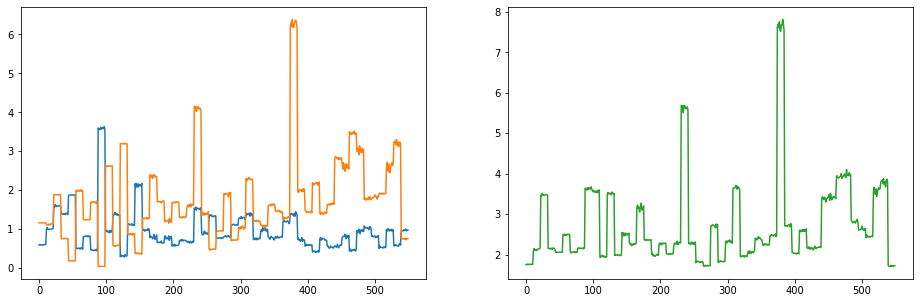

In [32]:
plt.figure(figsize=(16, 5))

gen_losses = np.array([batch_loss for epoch_loss in losses['generator'] for batch_loss in epoch_loss])
disc_losses = np.array([batch_loss for epoch_loss in losses['discriminator'] for batch_loss in epoch_loss])

ax = plt.subplot(121)
ax.plot(gen_losses)
ax.plot(disc_losses)

ax = plt.subplot(122)
ax.plot(gen_losses + disc_losses, c='C2')

In [33]:
samples_file = '../synthetic/{}/predicted.h5'.format(name)

with h5py.File(samples_file, 'r') as hf:
    x = np.array(hf.get('X'))

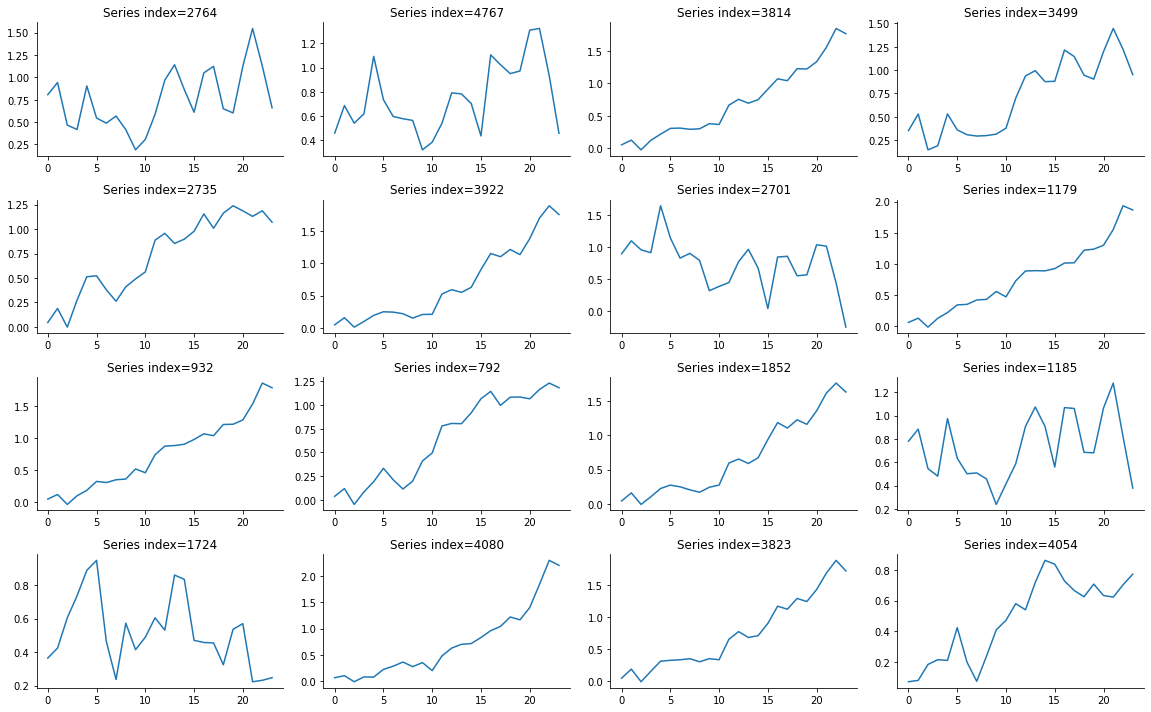

In [36]:
np.random.seed(1)
ind = np.random.permutation(len(x))[:16]

plt.figure(figsize=(16, 10))

for i in range(16):
    ax = plt.subplot(4, 4, i+1)
    series = x[ind[i]]
    ax.plot(series)
    ax.set_title('Series index={}'.format(ind[i]))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
plt.tight_layout()